<a href="https://colab.research.google.com/github/sagarladla/D2Ls_Deep_Learning-Pytorch/blob/master/2_4_Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import torch
from IPython import display
import numpy as np

In [69]:
def f(x):
  return 3 * x ** 2 - 4 * x

def ff(x):
  return x**3 - 1/x

def slope(x):
  return 3 * x ** 2 + x ** -2

def numerical_limit(x,h):
  return (f(x+h)-f(x))/h

h=0.1
for i in range(10):
  print("h=%.10f, numerical limit=%.10f"%(h, numerical_limit(1,h)))
  h*=0.1

h=0.1000000000, numerical limit=2.3000000000
h=0.0100000000, numerical limit=2.0300000000
h=0.0010000000, numerical limit=2.0030000000
h=0.0001000000, numerical limit=2.0003000000
h=0.0000100000, numerical limit=2.0000300000
h=0.0000010000, numerical limit=2.0000030001
h=0.0000001000, numerical limit=2.0000002987
h=0.0000000100, numerical limit=1.9999999878
h=0.0000000010, numerical limit=2.0000001655
h=0.0000000001, numerical limit=2.0000001655


In [0]:
def use_svg_display():  #@save
  """Use the svg format to display a plot in Notebook"""
  display.set_matplotlib_formats("svg")

def set_figsize(figsize=(3.5,2.5)): #@save
  """Set the figure size for matplotlib"""
  use_svg_display()
  plt.rcParams['figure.figsize'] = figsize

#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
  """Set the axes for matplotlib"""
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel)
  axes.set_xscale(xscale)
  axes.set_yscale(yscale)
  axes.set_xlim(xlim)
  axes.set_ylim(ylim)
  if legend:
    axes.legend(legend)
  axes.grid()

In [0]:
#@save
def plot(X,Y=None,xlabel=None,ylabel=None,xlim=None,ylim=None,legend=None,xscale="linear",yscale="linear",fmts=("-","m--","g-.","r:"),figsize=(3.5,2.5),axes=None):
  """Plot data instances"""
  if legend is None:
    legend=[]

  set_figsize(figsize)
  axes=axes if axes else plt.gca()

  # Return true if `X` (tensor or list) has 1 axis
  def has_one_axis(X):
    return (hasattr(X, "ndim") and X.ndim==1 or isinstance(X,list) and not hasattr(X[0], "__len__"))
  
  if has_one_axis(X):
    X=[X]
  if Y is None:
    X,Y=[[]]*len(X),X
  elif has_one_axis(Y):
    Y=[Y]
  if len(X)!=len(Y):
    X=X*len(Y)
  axes.cla()
  for x,y,fmt in zip(X,Y,fmts):
    if len(x):
      axes.plot(x,y,fmt)
    else:
      axes.plot(y,fmt)
  set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend)

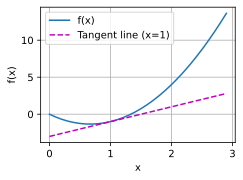

In [72]:
x=np.arange(0,3,0.1)
plot(x,[f(x), 2*x-3], 'x','f(x)',legend=['f(x)','Tangent line (x=1)'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


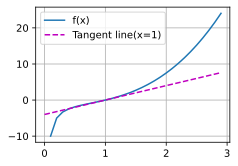

In [74]:
# 1. Plot y = f(x) = x**3 - 1/x and its tangent at x=1
x=np.arange(0,3,0.1)
plot(x, [ff(x),4*x-4],legend=['f(x)','Tangent line(x=1)'])

# Explanation:

f(x) = x<sup>3</sup> - 1/x ==========|========== f ' (x) = 3x<sup>2</sup> + x<sup>-2</sup>

<u>Given: at</u>  __x<sub>1</sub> = 1__

f ' (x<sub>1</sub>) = 3(1) + 1 = <em>__4 = m__</em>

y<sub>1</sub> = f (x<sub>1</sub>) = 1<sup>3</sup> - 1/1 = <em>__0 = y<sub>1</sub>__</em>


****y - y<sub>1</sub> = m (x - x<sub>1</sub>)****
-----------------------------------------------

y - 0 = 4 * (x - 1)
<code>y = 4x - 4</code>
----------------------------------------------

In [0]:
# 2. 